In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import integrate
import math
import pandas as pd
import seaborn as sns

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


# Exercise 1. 

In [2]:
N=1000
mu=0
sigma=3
x = np.random.normal(0,3,N)

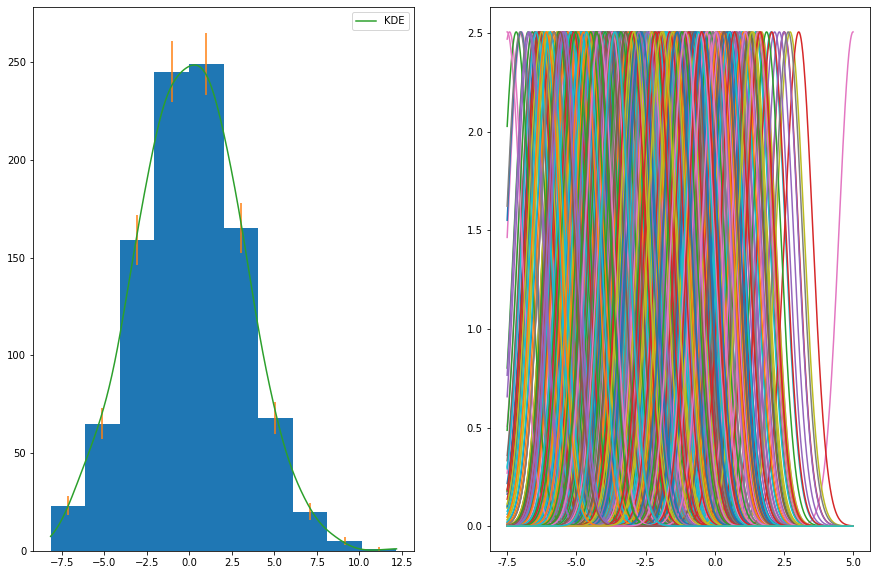

In [3]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
n, bins, patches = ax[0].hist(x)
ax[0].set_ylabel="Counts"
bin_centers = 0.5*(bins[1:] + bins[:-1])
ax[0].errorbar(bin_centers,n,yerr = n**0.5,linestyle='None')

g_std=1.06*np.std(x)*len(x)**(-1/5)
g_total=0
for m in x:
    g = stats.norm(m, g_std).pdf(np.linspace(np.min(x),np.max(x),N))*2*math.pi*g_std
    ax[1].plot(g)
    g_total += g
ax[1].set_xticklabels(ax[0].get_xticks())


norm_const = integrate.trapz(y=g_total,x=np.linspace(np.min(x),np.max(x),N))
area_of_hist=sum(n*(bins[1:] - bins[:-1]))
gaussianKDE = area_of_hist*g_total/norm_const
ax[0].plot(np.linspace(np.min(x),np.max(x),N),gaussianKDE, label="KDE")

ax[0].legend()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2019-10-08 18:36:25--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2019-10-08 18:36:25--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca46ef1171d58a8e654380c438c.dl.dropboxusercontent.com/cd/0/inline/AqBJybo2821zCAUYJWXDVJOqzDdFlrhWf5zVm6qRLqGa-mbS7IxUVxo2CWQcxHWug3xFHrUdMiv66EfIfNERmzlhiNpsb227JAd9Pbx8sdFTWA/file# [following]
--2019-10-08 18:36:26--  https://uca46ef1171d58a8e654380c438c.dl.dropboxusercontent.com/cd/0/inline/AqBJybo2821zCAUYJWXDVJOqzDdFlrhWf5zVm6qRLqGa-mbS7IxUVxo2CWQcxHWug3xFHrUdMiv

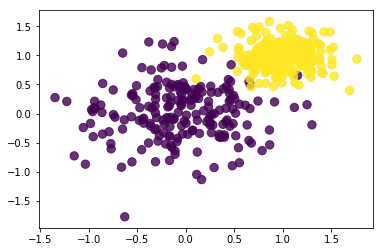

In [4]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


In [5]:
mean1 = [0,0]
cov1=np.diag([1,5])

mean2 = [6,-5]
cov2=[[3,2],[2,1]]

N=10**4

/home/clara/anaconda3/envs/env1/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


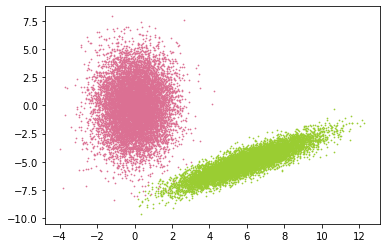

In [6]:
x1, y1 = np.random.multivariate_normal(mean1, cov1, N).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, N).T

plt.scatter(x1,y1,color="palevioletred",s=0.5)
plt.scatter(x2,y2,color="yellowgreen",s=0.5)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [7]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2019-10-08 18:36:27--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2019-10-08 18:36:27--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca812285f4c9b6a9491cd880bef.dl.dropboxusercontent.com/cd/0/inline/AqCbKMemIr_VwYyaHjLSE93CVWQXMfTCe6nDv4hqey8CXdPLNdYd7iAo6m3Y0T3ZHI544EC5GU_aT4r97lTt4owkFm1EuIPy75uHliyKDwvZpw/file# [following]
--2019-10-08 18:36:27--  https://uca812285f4c9b6a9491cd880bef.dl.dropboxusercontent.com/cd/0/inline/AqCbKMemIr_VwYyaHjLSE93CVWQXMfTCe6nDv4hqey8CXdPLNdYd7iAo6m3Y0T3ZHI544EC5GU_aT4r97lTt4owkFm1EuIPy75uHliyKDwvZpw/file
R

In [8]:
a = np.load("residuals_261.npy",allow_pickle=True)

In [9]:
data = pd.DataFrame(a.item())
data=data[abs(data.residuals)<2]
data.head()

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0


In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data.distances,data.residuals)

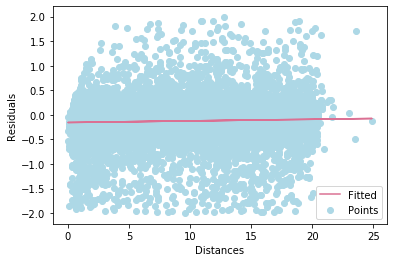

In [11]:
plt.scatter(data.distances,data.residuals,color="lightblue",label="Points")
plt.xlabel("Distances")
plt.ylabel("Residuals")
y = data.distances*slope + intercept
plt.plot(data.distances,y,color="palevioletred",label="Fitted")
plt.legend()

Text(0.5, 1.0, 'LinReg summary:\nslope=0.0032597701220305835\nintercept=-0.15432816763069473')

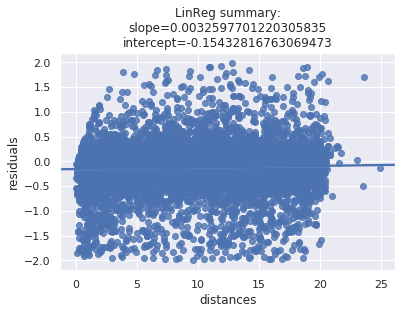

In [12]:
sns.set(color_codes=True)
t=("LinReg summary:\nslope="+str(slope)+"\nintercept="+str(intercept))
sns.regplot(data.distances,data.residuals).set_title(t)

In [13]:
num_bins = math.ceil(math.log(len(data),2))+1 #sturges formula
bin_edges=np.linspace(np.min(data.distances),np.max(data.distances),num_bins)
bin_gap=(bin_edges[1]-bin_edges[0])/2 #its the same for all of them
x=bin_edges+bin_gap

y=[]
erry=[]
for i in range(len(bin_edges)-1):
    mask = (bin_edges[i] <= data["distances"]) & (data["distances"] < bin_edges[i+1])
    y.append(np.mean(data.loc[mask]["residuals"]))
    erry.append(np.std(data.loc[mask]["residuals"]))
    #print(bin_edges)

<ErrorbarContainer object of 3 artists>

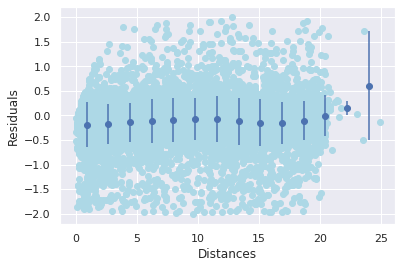

In [14]:
plt.scatter(data.distances,data.residuals,color="lightblue",label="Points")
plt.xlabel("Distances")
plt.ylabel("Residuals")
plt.scatter(x[:-1],y)
plt.errorbar(x[:-1],y,erry,linestyle='None')

In [15]:
##the vary bad shape of the last points is due to the fact there not many points fall in that bin, 
#it can be considered an outlier. An idea could be merge it with the previuous bin